In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(r"C:\CHURN\CHURN\Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:

del df["Surname"]
del df["RowNumber"]


In [61]:
df.set_index("CustomerId", inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


<AxesSubplot: title={'center': 'Tenure'}, xlabel='CustomerId'>

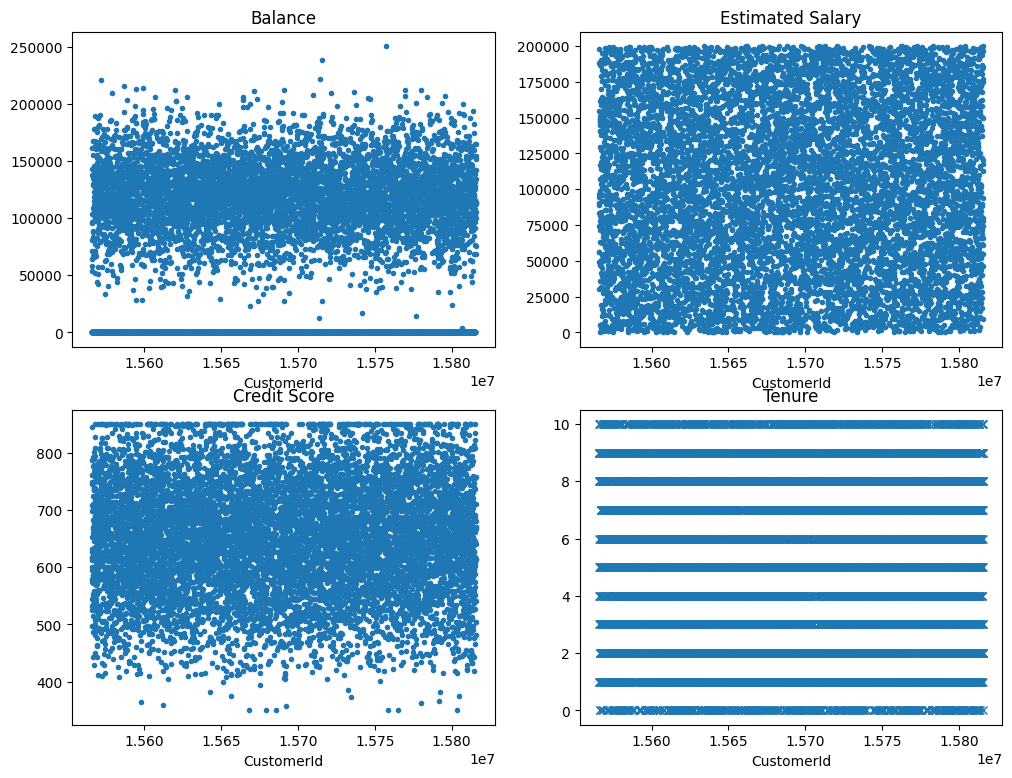

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False)

#add DataFrames to subplots
df["Balance"].plot(style=".",ax=axes[0,0], title="Balance", figsize=(12,9))
df["EstimatedSalary"].plot(style=".",ax=axes[0,1], title="Estimated Salary", figsize=(12,9))
df["CreditScore"].plot(style=".", ax=axes[1,0], title="Credit Score", figsize=(12,9))
df["Tenure"].plot(style="x",ax=axes[1,1], title="Tenure", figsize=(12,9))

<AxesSubplot: title={'center': 'Has Credit Card'}>

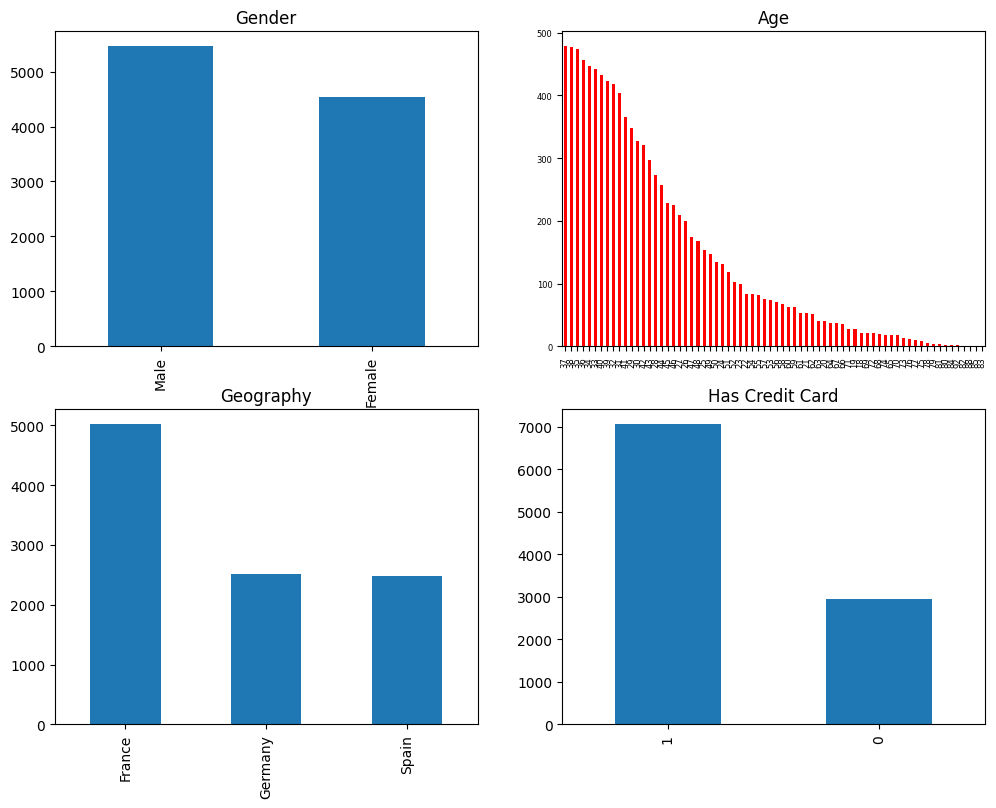

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False)

#add DataFrames to subplots
df["Gender"].value_counts().plot(kind="bar",ax=axes[0,0], title="Gender", figsize=(12,9))
df["Age"].value_counts().plot(kind="bar",ax=axes[0,1], title="Age", figsize=(12,9), color = "red",fontsize=6)
df["Geography"].value_counts().plot(kind="bar", ax=axes[1,0], title="Geography", figsize=(12,9))
df["HasCrCard"].value_counts().plot(kind="bar",ax=axes[1,1], title="Has Credit Card", figsize=(12,9))

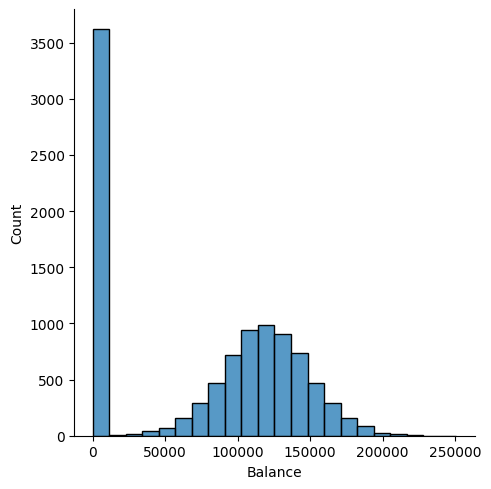

In [65]:
sns.displot(df["Balance"])

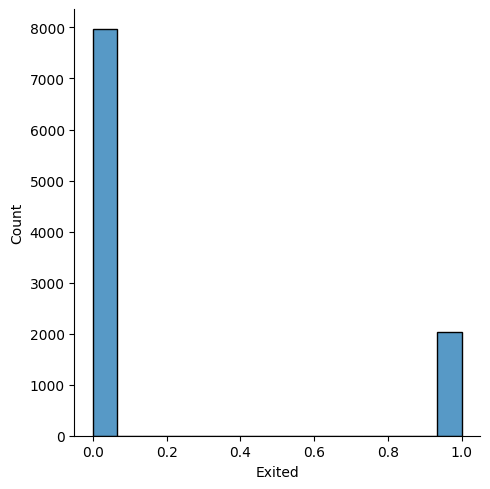

In [66]:
sns.displot(df["Exited"])

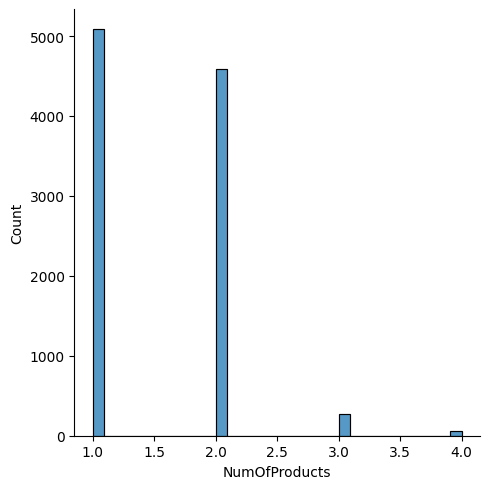

In [67]:
sns.displot(df["NumOfProducts"])

C:\Users\yusuf\AppData\Local\Temp\ipykernel_15936\1503699813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="BuPu")


<AxesSubplot: >

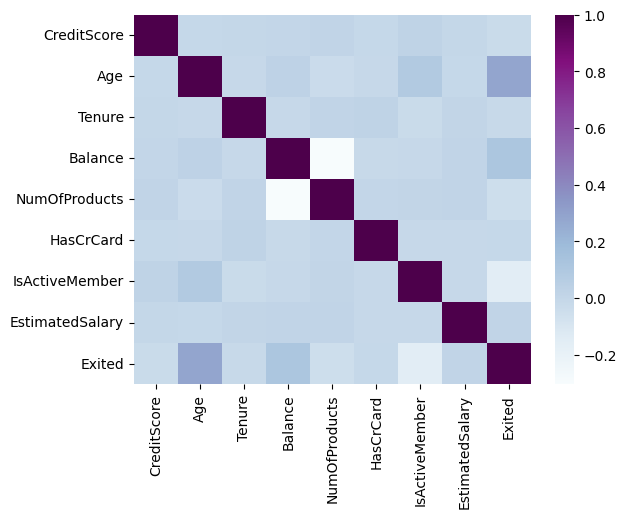

In [68]:
sns.heatmap(df.corr(), cmap="BuPu")

In [69]:
df2 = df.drop(index=[row for row in df.index if 0 == df.loc[row, 'Balance']])

C:\Users\yusuf\AppData\Local\Temp\ipykernel_15936\3642126025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap="BuPu")


<AxesSubplot: >

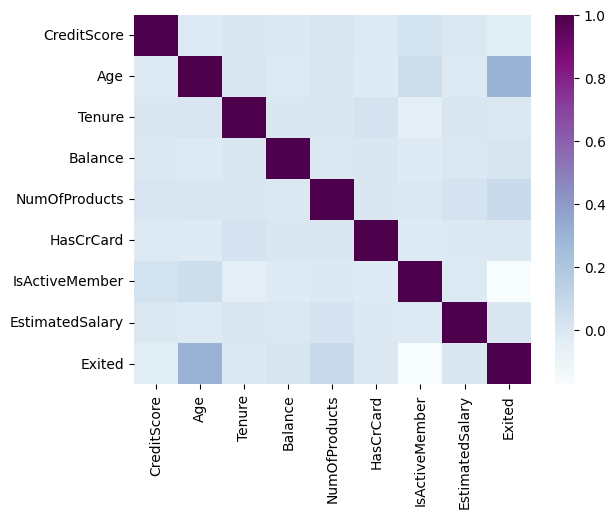

In [70]:
sns.heatmap(df2.corr(), cmap="BuPu")

In [71]:
df["IsActiveMember"] = df["IsActiveMember"].astype(object)
df["HasCrCard"] = df["HasCrCard"].astype(object)
df["Exited"] = df["Exited"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.2+ MB


In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split



In [73]:
y = df["Exited"]
X = df.drop("Exited", axis=1)
X = pd.get_dummies(X)
X.head()
y.head()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_15936\1342605921.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_15936\1342605921.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)


CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
Name: Exited, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

0.8224

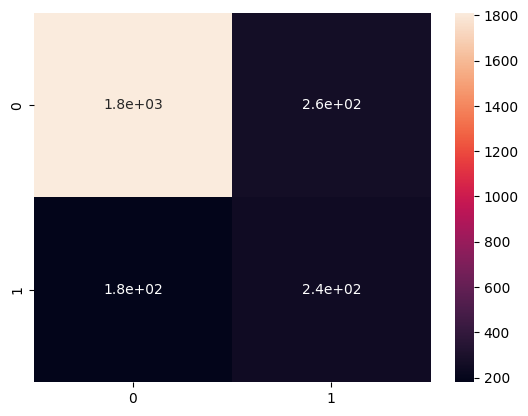

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

model = make_pipeline(StandardScaler(), DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=3))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_pred,y_test), annot = True)
metrics.accuracy_score(y_pred,y_test)

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

gnb = make_pipeline(StandardScaler(),GaussianNB())
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
cfm = metrics.confusion_matrix(y_pred, y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.8036

In [77]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(C=0.1,gamma='auto', kernel="linear"))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cfm = metrics.confusion_matrix(y_pred,y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.7964

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = make_pipeline(StandardScaler(),RandomForestClassifier(min_samples_leaf=5,min_samples_split=5,max_depth=5, random_state=0, n_estimators=150))
model = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfm = metrics.confusion_matrix(y_pred, y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.8412

In [79]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8476

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C=0.2).fit(X, y)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.786